In [56]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
%reload_ext autoreload
%autoreload 2

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "DejaVu Sans",
    "font.size": 12,
})
plt.rc('text.latex', preamble=r'\usepackage{bm}\usepackage{color}')
figsize = 7

%matplotlib inline 
#%matplotlib widget
#%matplotlib notebook

In [57]:
outdir = "../_results/"
#outdir = "_results_final/"
#outdir = "_results_server/"

# Problem setup

In [58]:
from poly_certificate.sdp_setup import get_f
from poly_certificate.problem import Problem

#N = 100
N = 3
d = 3
K = 7

sigma_dist_est = 1
sigma_acc_est = 1

sigma_dist_real = 0.0
sigma_acc_real = 0.2

np.random.seed(0)

prob = Problem(N, d, K)
prob.generate_random(sigma_acc_real=sigma_acc_real, sigma_dist_real=sigma_dist_real)

/tmp/ipykernel_53434/4065996242.py:36: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


saved plot as _plots/Q_all.pdf


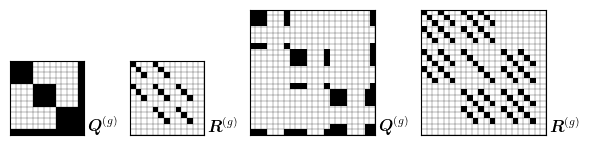

In [59]:
from poly_certificate.sdp_setup import get_prob_matrices
from utils.plotting_tools import plot_decomposition, savefig

scale = 0.08
regs = [
    "no", 
    "zero-velocity", 
    "constant-velocity"
]
all_dict = {}; 
for reg in regs:
    Q, A_0, A_list, R = get_prob_matrices(prob, regularization=reg)
    if type(A_0) == list:
        mat_dict = {
            f"$$A_{n}$$":A_n.toarray() for n, A_n in enumerate(A_0)
        }
    mat_dict = dict(
        Q=Q.toarray(),
        A1=A_list[0].toarray(),
    )
    if R is not None:
        mat_dict["R"] = R.toarray()
    
    if (R is not None) and (N < 10):
        all_dict.update({
            f"Q\_{reg[0]}": np.abs(Q.toarray()) > 1e-10,
            f"R\_{reg[0]}": np.abs(R.toarray()) > 1e-10,
        }) 
        
fig, axs = plot_decomposition(**all_dict, colorbar=False, log=False, 
                         cmap="Greys", return_all=True, titles=None)
[ax.set_title("") for ax in axs]
[ax.set_ylabel("$\\bm{{Q}}^{{(g)}}$", rotation=0) for ax in [axs[0], axs[2]]]
[ax.set_ylabel("$\\bm{{R}}^{{(g)}}$", rotation=0) for ax in [axs[1], axs[3]]]
fig.set_size_inches(6, 2.0) 
fig.tight_layout()
axs[0].xaxis.set_label_coords(1.3, -0.09)
axs[2].xaxis.set_label_coords(1.2, -0.05)
axs[0].yaxis.set_label_coords(1.25, 0)
axs[1].yaxis.set_label_coords(1.25, 0)
axs[2].yaxis.set_label_coords(1.15, 0)
axs[3].yaxis.set_label_coords(1.15, 0)
[ax.yaxis.set_ticks_position('none') for ax in axs]
[ax.xaxis.set_ticks_position('none') for ax in axs]
savefig(fig, f"_plots/Q_all.pdf")

# Certificate study with fixed N, increasing noise

In [60]:
def remove_invalid_rows(results, verbose=False):
    """ For very few noise levels and setup seeds, all initializations lead to local minima, 
    accoding to the certificate.
    Since we don't have global minima to compare to, we remove these from the results.
    """
    remove_index = []
    for (reg, noise), df_noise in results.groupby(["regularization", "sigma dist real"]):
        if verbose:
            print(reg, noise)
        for seed, df in df_noise.groupby("setup seed"):
            local_ = df.loc[df["cert value"] < 0]
            inits_local = local_["init seed"].unique()
            if len(inits_local) == 0:
                continue
                

            if verbose:
                print(f"for seed {seed}, inits leading to local minima:", inits_local)
            if len(inits_local) == len(df):
                print(f"noise {noise} invalid seed:", seed)
                remove_index += list(df.index.values)
            #else:
            #    global_ = df.loc[df["cert value"] >= 0]
            #    local_min = local_.cost.values.astype(float).min()
            #    global_max = global_.cost.values.astype(float).max()
                #print("relative difference:", (local_min - global_max) / global_max)
                #print(f"local: {local_min:.1e}, global: {global_max:.1e}")
    return results.drop(index=remove_index, inplace=False)

In [61]:
import pandas as pd 
from utils.plotting_tools import plot_cert_fn_tp, savefig
import os

#name = "simulation_test"
name = "simulation_noise"
fname = outdir + name + "/results.pkl"
#fname = outdir + name + "/results_tol_1e-2.pkl"

try:
    results = pd.read_pickle(fname)
    print("read", fname)
except:
    print(f"{fname} not found, generate with simulate_cert_new.py")
    
print("number of rows before:", len(results))
results = remove_invalid_rows(results, verbose=False)
print("number of rows after:", len(results))

read ../_results/simulation_noise/results.pkl
number of rows before: 21000
noise 100.0 invalid seed: 3
noise 100.0 invalid seed: 7
noise 100.0 invalid seed: 12
noise 100.0 invalid seed: 15
noise 100.0 invalid seed: 16
noise 100.0 invalid seed: 17
noise 100.0 invalid seed: 19
noise 100.0 invalid seed: 22
noise 100.0 invalid seed: 26
noise 100.0 invalid seed: 28
noise 100.0 invalid seed: 29
noise 100.0 invalid seed: 39
noise 100.0 invalid seed: 40
noise 100.0 invalid seed: 44
noise 100.0 invalid seed: 45
noise 100.0 invalid seed: 53
noise 100.0 invalid seed: 56
noise 100.0 invalid seed: 57
noise 100.0 invalid seed: 62
noise 100.0 invalid seed: 65
noise 100.0 invalid seed: 72
noise 100.0 invalid seed: 75
noise 100.0 invalid seed: 84
noise 100.0 invalid seed: 85
noise 100.0 invalid seed: 86
noise 100.0 invalid seed: 87
noise 100.0 invalid seed: 88
noise 100.0 invalid seed: 96
noise 100.0 invalid seed: 98
noise 10.0 invalid seed: 70
noise 10.0 invalid seed: 85
noise 100.0 invalid seed: 12
n

/home/asrl/research/dev_safe_and_smooth/utils/plotting_tools.py:267: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
/home/asrl/research/dev_safe_and_smooth/utils/plotting_tools.py:267: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
/tmp/ipykernel_53434/947824290.py:43: UserWarning: The figure layout has changed to tight
  fig_bin.tight_layout()


saved plot as _plots/simulation_noise.pdf
saved plot as _plots/simulation_noise.jpg


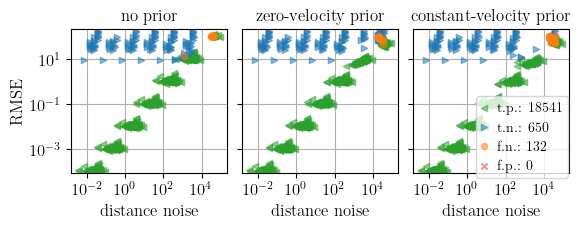

In [62]:
from utils.plotting_tools import fill_fn_tp, fn_tp_styles
regularization = results.regularization.unique()

fig_bin, axs_bin = plt.subplots(1, len(regularization), sharey=True, squeeze=False)
#fig_bin.set_size_inches(figsize*0.85, figsize*0.45)
fig_bin.set_size_inches(figsize*0.85, figsize*0.35)

ylabel = "error" if "error" in results.columns else "rmse"

labels = {key: 0 for key in fn_tp_styles.keys()}
for i, m in enumerate(regularization):
    df = results[results.regularization==m].copy()
    axs_bin[0, i].set_xscale("log")
    axs_bin[0, i].set_yscale("log")
    
    df.loc[:, "result"] = ""
    df = df.apply(fill_fn_tp, axis=1)
    
    # reduce number of datapoints because otherwise the 
    # final plot will be too large
    df["error_id"] = [f"{y:.5e}" for y in df[ylabel].values]
    df["error_id"] = df["error_id"].astype(float)
    df_small = df.groupby("error_id", as_index=False).aggregate("first")
    plot_cert_fn_tp(df_small, xlabel="noise", ylabel="error_id", ax=axs_bin[0, i], s=20.0, alpha=0.5)
    #plot_cert_fn_tp(df, xlabel="sigma dist real", ax=axs_bin[0, i], s=20.0, alpha=0.5)
    
    xticks = [1e-2, 1e0, 1e2, 1e4]
    axs_bin[0, i].set_xticks(xticks)
    #axs_bin[0, i].set_xticklabels(xticks)
    axs_bin[0, i].set_title(f"{m} prior", fontsize=12)
    for label in labels.keys():
        labels[label] += len(df[df.result == label])
    
labels_with_num = [f"{key}: {val}" for key, val in labels.items()]
fig_bin.legend(labels=labels_with_num,
               loc="lower right", 
               bbox_to_anchor=[0.98, 0.21],
               fontsize=10, handlelength=0.3)

#axs_bin[0, 0].set_ylim(1e-4, 1e4)
#axs_bin[0, 0].set_yticks([1e-3, 1e-1, 1e1, 1e3])
axs_bin[0, 0].set_ylabel("RMSE", fontsize=12)
fig_bin.tight_layout()
fig_bin.subplots_adjust(wspace=0.1)

savefig(fig_bin, f"_plots/{name}.pdf")
savefig(fig_bin, f"_plots/{name}.jpg")

sigmas: 0.001 0.2
number of setups with local solutions: 6
found 1 local solutions for 9
found 6 local solutions for 17
plotting...
found 5 local solutions for 22
plotting...
found 7 local solutions for 36
plotting...
found 1 local solutions for 39
found 1 local solutions for 56
found 1 local solutions for 83
found 4 local solutions for 85
plotting...
found 3 local solutions for 86
plotting...
found 6 local solutions for 88
plotting...
saved plot as _plots/local_minimum_sim.pdf


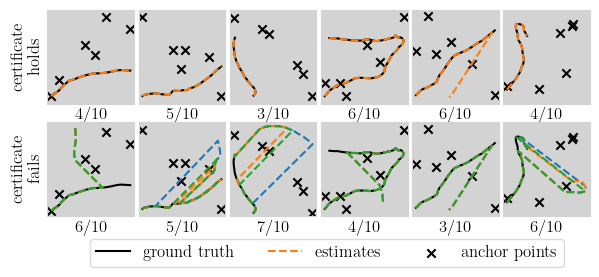

In [63]:
from utils.plotting_tools import add_scalebar
from poly_certificate.gauss_newton import gauss_newton
from utils.helper_params import load_parameters

params= load_parameters(name, outdir)
regularization = "constant-velocity"
#regularization = "no"
sigma_dist_real = params["sigma_dist_real"][1]
sigma_acc_est = params["sigma_acc_est"][0]
print("sigmas:", sigma_dist_real, sigma_acc_est)

df = results.loc[
    (results.regularization == regularization) & 
    (results["sigma dist real"]==sigma_dist_real)
].copy()

counter = 0

N = 100
d = 2
K = 6

n_local = 3
n_examples = 6
n_examples = min(n_examples, len(df[df.solution=="local"]["setup seed"].unique()))
print("number of setups with local solutions:", n_examples)

size = 1
fig, axs = plt.subplots(2, n_examples, sharex='col')
#fig.set_size_inches(size * n_examples, size * 2.3)
fig.set_size_inches(figsize, figsize / n_examples * 2.3)
fig.subplots_adjust(wspace=0.05)
for n_it, df_ in df.groupby("setup seed"):
    if not len(df_[df_.solution=="local"]):
        continue
        
    n_total = len(df_)
    n_local_sol = len(df_[df_.solution=="local"])
    n_global_sol = len(df_[df_.solution=="global"])
    
    print(f"found {n_local_sol} local solutions for", n_it)
    if n_local_sol == 1:
        continue
        
    print("plotting...")
    np.random.seed(n_it)
    prob = Problem(
        N, d, K, 
        sigma_acc_est=sigma_acc_est,
        sigma_dist_est=sigma_dist_real
    )
    prob.generate_random(sigma_dist_real=sigma_dist_real, sigma_acc_real=sigma_acc_real, verbose=False)
    
    # sanity check that we are generating the same setup
    test_noise = prob.calculate_noise_level()
    np.testing.assert_allclose(test_noise, df_.noise.unique()[0])
    
    axs[0, counter].plot(prob.trajectory[:, 0], prob.trajectory[:, 1], color="k", label="ground truth")
    axs[1, counter].plot(prob.trajectory[:, 0], prob.trajectory[:, 1], color="k", label="ground truth")
    
    df_tn = df_[df_.solution=="global"]
    row = df_tn.iloc[0]
    assert row["cert value"] >= 0
    
    np.random.seed(row["init seed"])
    theta_0 = prob.random_init(regularization)
    theta_est, stats = gauss_newton(theta_0, prob, regularization=regularization)
    
    axs[0, counter].plot(theta_est[:, 0], theta_est[:, 1], color="C1", ls="--", label="estimates")
    
    df_tp = df_[df_.solution=="local"]
    for i in range(min(n_local, len(df_tp))):
        row = df_tp.iloc[i]
        assert row["cert value"] < 0
            
        np.random.seed(row["init seed"])
        theta_0 = prob.random_traj_init(regularization)
        theta_est, stats = gauss_newton(theta_0, prob, regularization=regularization)
        
        label = "estimates" if i == 1 else None
        axs[1, counter].plot(theta_est[:, 0], theta_est[:, 1], color=f"C{i}", ls="--", label=label)
        
    axs[0, counter].scatter(*prob.anchors[:, :2].T, marker="x", color="k", label="anchor points")
    axs[1, counter].scatter(*prob.anchors[:, :2].T, marker="x", color="k", label="anchor points")
    axs[0, counter].axis("equal")
    axs[1, counter].axis("equal")
    
    [ax.set_xticks([]) for ax in axs.flatten()]
    [ax.set_yticks([]) for ax in axs.flatten()]
    #[add_scalebar(ax, size=50, loc="upper right") for ax in axs[0, :]]
    
    axs[0, 0].set_ylabel("certificate \nholds", fontsize=12)
    axs[1, 0].set_ylabel("certificate \nfails", fontsize=12)
    
    axs[0, counter].set_xlabel(f"{n_global_sol}/{n_total}", y=0.0, fontsize=12)
    axs[1, counter].set_xlabel(f"{n_local_sol}/{n_total}", y=0.0, fontsize=12)
    axs[0, counter].xaxis.set_label_coords(0.5, -0.03)
    axs[1, counter].xaxis.set_label_coords(0.5, -0.03)
    
    
    for ax in axs.flatten():
        for spine in ax.spines.values():
            spine.set_edgecolor('lightgray')
        ax.set_facecolor('lightgray')
        
    counter += 1
    if counter >= n_examples:
        break
leg = axs[1, -1].legend(ncol=3, loc="upper right", bbox_to_anchor=[0.8, -0.15], fontsize=12)
#leg.get_frame().set_facecolor("lightgray")
leg.get_frame().set_edgecolor("lightgray")
savefig(fig, "_plots/local_minimum_sim.pdf")

# Certificate study with increasing N, fixed noise

saved plot as _plots/certificates_timing.pdf


,N,time,method,status
0,10,0.002049,solve,converged in stepsize at 10
1,10,0.000444,duals,converged in stepsize at 10
2,10,0.005421,certificate,converged in stepsize at 10
3,31,0.002255,solve,converged in stepsize at 8
4,31,0.0007,duals,converged in stepsize at 8
5,31,0.010631,certificate,converged in stepsize at 8
6,100,0.003205,solve,converged in stepsize at 6
7,100,0.002155,duals,converged in stepsize at 6
8,100,0.032131,certificate,converged in stepsize at 6
9,316,0.010465,solve,converged in stepsize at 7


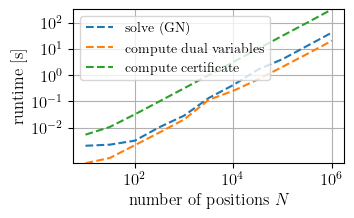

In [65]:
import seaborn as sns
import pandas as pd

labels = {
    "solve": "solve (GN)",
    "duals": "compute dual variables",
    "certificate": "compute certificate"
}
try:
    fname = f"{outdir}/simulation_time.pkl"
    results = pd.read_pickle(fname)

    fig, ax = plt.subplots()
    fig.set_size_inches(figsize/2, 2)
    for method, df in results.groupby("method", sort=False):
        ax.plot(df.N, df.time, ls="--", label=labels[method])
        
    #ax.legend(loc="lower right")
    #ax.legend(loc="upper left", bbox_to_anchor=[1.0, 1.0])
    ax.legend(loc="upper left", fontsize=10)
    ax.grid(which="major")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.minorticks_off()
    yticks = np.logspace(-2, 2, 5)
    ax.set_yticks(yticks)
    ax.set_yticklabels([f"$10^{{{np.log10(y):.0f}}}$" for y in yticks])
    ax.set_ylabel("runtime [s]", fontsize=12)
    ax.set_xlabel("number of positions $N$", fontsize=12)
    savefig(fig, "_plots/certificates_timing.pdf")
except Exception as e:
    print(e)
    print(f"{fname} not found, generate with simulate_time.py")
results

# Real data

### Certificate evaluation

In [ ]:
from utils.plotting_tools import plot_3d_curves, savefig
from _scripts.evaluate_real import ANCHOR_CHOICE
#fname = "_results/real_top_estimate/results.pkl"
name = "real_top_estimate"
fname = os.path.join(outdir, name, "results.pkl")
results = pd.read_pickle(fname)
results

In [ ]:
inits = ["gt", "half-flip"]
solutions = ["global", "local"]

for (dataset, regularization), df in results.groupby(["dataset", "regularization"]):
    prob = Problem.init_from_dataset(dataset, traj_only=True, use_anchors=ANCHOR_CHOICE["top"])
    
    fig3d = plt.figure() 
    fig3d.set_size_inches(figsize, figsize / len(inits))
    
    zlabel=False
    titles = ["certified global minimum", "uncertified local minimum",]
    for i, (init, sol) in enumerate(zip(inits, solutions)):
        rows = df[df.init == init]
        if len(rows) != 1:
            print("skipping", rows)
        
        row = rows.iloc[0]
        assert len(rows) == 1
        
        ax3d = fig3d.add_subplot(1, len(inits), i+1, projection="3d")
        styles = {
            "estimate": dict(color="C1", s=5, marker="."),
            "ground truth": dict(color="k", s=5, marker=".")
        }
        plot_3d_curves({"ground truth": row["ground truth"], "estimate": row["estimate"]}, 
                       anchors=prob.anchors, plotly=False, styles=styles, ax=ax3d, zlabel=zlabel)
        ax3d.set_zlim(0, 5)
        ax3d.set_title(titles[i], y=0.96, loc="center", fontsize=12)
        #ax3d.set_rasterized(True)
        zlabel=True
    ax3d.legend(ncol=3, bbox_to_anchor=[-0.2, 0.05], loc="upper center", fontsize=12)
    #fig3d.subplots_adjust(wspace=0.1)
    savefig(fig3d, f"_plots/real_certificate_{dataset}.pdf")

In [ ]:
name = "real_top"
fname = os.path.join(outdir, name, "results.pkl")
#fname = "_results_server/real_top/results.pkl"
#fname = "_results/real_top/results.pkl"
results = pd.read_pickle(fname)
results

In [ ]:
print("average cert time:", results["time cert"].mean())
print("average solve time:", results["time solve"].mean())
print("average total time:", results["time cert"].mean() + results["time solve"].mean())

In [ ]:
def plot_rmse_cost(results):
    results = results.apply(pd.to_numeric, errors="ignore", axis=1)
    results.loc[:, "certificate binary"] = results.certificate >= 0
    #sns.scatterplot(data=results, x="RMSE", y="cost", hue="dataset", ax=ax, style="certificate binary", legend="brief")

    fig, ax = plt.subplots()
    styles = {
        True: "x",
        False:"o"
    }
    sizes = {
        True: 50,
        False: 20
    }
    cmap = plt.get_cmap("viridis", len(results.dataset.unique()))
    #for i, (dataset, df) in enumerate(results.groupby("dataset")):
    for i in range(1, 17)[::-1]:
        dataset = f"trial{i}"
        df = results[results.dataset==dataset]
        if dataset == "trial1":
            color = "C1"
            label = dataset
        elif dataset == "trial13":
            color = "C2"
            label = dataset
        elif dataset == "trial16":
            color = "C0"
            label= dataset
        else:
            color = "lightgray"
            label = None
        for cert, df_cert in df.groupby("certificate binary"):
            ax.scatter(df_cert.RMSE.values, df_cert.cost.values, color=color, marker=styles[cert], s=sizes[cert])
        ax.scatter([], [], color=color, marker=styles[True], s=sizes[True], label=label)
    ax.scatter([], [], color="lightgray", marker=styles[True], s=sizes[True], label="all others")
    #ax.scatter([], [], color="gray", marker=styles[True], label="certificate holds")
    #ax.scatter([], [], color="gray", marker=styles[False], label="certificate fails")
    ax.legend(loc="upper center", bbox_to_anchor=[0.4, 0.95], fontsize=10)
    ax.set_xlabel("RMSE $[$m$]$", fontsize=12)
    ax.set_ylabel("total cost", fontsize=12)
    ax.grid()
    fig.set_size_inches(figsize/2, 2)
    return fig
    
fig = plot_rmse_cost(results)
savefig(fig, "_plots/real-cost-rmse.pdf")

### Motion model evaluation

In [ ]:
name = "real_top_calib"
fname = os.path.join(outdir, name, "results.pkl")
results = pd.read_pickle(fname)

In [ ]:
from utils.plotting_tools import add_scalebar, savefig, plot_covariance
from poly_certificate.problem import Problem

init = "gt"
plot_covariance = False; scaling = 10

datasets = results.dataset.unique()[:1]
#sigmas = results.sigma.unique()
sigmas = results.sigma.unique()[-3:]
regularization = results.regularization.unique()

fig, axs = plt.subplots(len(datasets), len(sigmas) * len(regularization), squeeze=False)
fig.set_size_inches(figsize, 1 * len(datasets))


for i, dataset in enumerate(datasets):
    df = results.loc[results.dataset == dataset]
    # to get the anchors locations
    prob = Problem.init_from_dataset(dataset, traj_only=True, use_anchors=ANCHOR_CHOICE["top"])
    for j1, reg in enumerate(regularization):
        for j2, sigma in enumerate(sigmas):
            j = j1 * len(sigmas) + j2
            
            rows = df.loc[(df.regularization == reg) & (df.sigma == sigma) & (df.init == init)]
            
            if len(rows) != 1:
                print("skipping:", rows)
                continue
                
            row = rows.iloc[0]
            color = f"C{j1}"
            axs[i, j].plot(row["ground truth"][:, 0], row["ground truth"][:, 1], color="k", ls="-", rasterized=True)
            axs[i, j].scatter(prob.anchors[:, 0], prob.anchors[:, 1], color="k", marker="x")
            
            axs[i, j].scatter(row.estimate[:, 0], row.estimate[:, 1], color=color, s=1.0, rasterized=True)
            
            if plot_covariance:
                select_ns = range(row.estimate.shape[0])[::10]
                print(f"plotting {len(select_ns)} covariance estimates")
                covs = get_posterior_covariances(prob, row["inverse covariance"], regularization=row.regularization, 
                                                 ns=select_ns)
                for cov_i, n in enumerate(select_ns):
                    plot_covariance(covs[cov_i], row.estimate[n, :2], scaling, axs[i, j], facecolor=color, alpha=0.5)
                
            if i == 0:
                axs[i, j].set_title(f"$\\sigma_a$={sigma}", y=0.95)
            print(f"dataset{row.dataset} reg:{row.regularization} rmse: {row.RMSE} cert: {row.certificate}")

            axs[i, j].grid("on", which="both")
            axs[i, j].xaxis.set_ticks_position('none')
            axs[i, j].yaxis.set_ticks_position('none')
            axs[i, j].set_xticklabels([])
            axs[i, j].set_yticklabels([])
            axs[i, j].set_xlim(-4.5, 4.5)
            axs[i, j].set_ylim(-4.5, 4.5)
            
            labels = {
                "MAE": row.MAE,
                #"\t$\\sigma$": np.mean(np.sqrt(row.var_xyz)),
                #"RMSE": row.RMSE
                "RMSE": row["RMSE unbiased"]
            }
            #xlabel = row.RMSE
            if j == 0:
                label = "\n".join([l+f" {v:.2f}m" for l, v in labels.items()])
                print(label)
                axs[i, j].set_xlabel(label, fontsize=12)
                axs[i, j].xaxis.set_label_coords(0.4, -0.05)
            else:
                label = "\n".join([f" {v:.2f}m" for l, v in labels.items()])
                print(label)
                axs[i, j].set_xlabel(label, fontsize=12)
                axs[i, j].xaxis.set_label_coords(0.5, -0.05)
    #axs[i, 0].set_xlabel(f"RMSE: {row.RMSE:.2f} m", fontsize=12)
    if len(datasets) > 1:
        axs[i, 0].set_ylabel(dataset, fontsize=12)
    axs[i, 0].yaxis.set_label_coords(-0.02, 0.5)
add_scalebar(axs[0, 0], size=2, size_vertical=2.0, loc="upper left", fontsize=10, color="white", pad=0.01)
add_scalebar(axs[0, 0], size=2, size_vertical=0.2, loc="upper left", fontsize=10, color="black", pad=0.2)
plt.figtext(0.17, 1.08, regularization[0] + " prior ($\\sigma_a$ in m/s)", fontsize=12) #,color="C0")
plt.figtext(0.54, 1.08, regularization[1] + " prior ($\\sigma_a$ in m/s$^{2}$)", fontsize=12) #,color="C1")
#savefig(fig, "_plots/real-solutions.jpg")
savefig(fig, "_plots/real-solutions.pdf")

### Variance estimation

In [ ]:
results
datasets = results.dataset.unique()

ls = {
    "zero-velocity": ":",
    "constant-velocity": "-"
}
errorbar=False

sigma = 1e-3

df = results.loc[results.sigma == sigma] 

times = {"zero-velocity":[], "constant-velocity":[]}

fig, axs = plt.subplots(2, sharex=True)
fig.set_size_inches(figsize, 3)

ax = axs[0]
ax_var = axs[1]

from matplotlib.patches import Rectangle
title_proxy = Rectangle((0,0), 0, 0, color='w')

legends = []
for reg, df_reg in df.groupby("regularization"):
    error_means = {0:[], 1:[], 2:[]} # xyz
    error_vars = {0:[], 1:[], 2:[]}
    for dataset_i, (dataset, df) in enumerate(df_reg.groupby("dataset")):
        assert len(df) == 1
        row = df.iloc[0]
        for i in range(3):
            error_means[i].append(abs(row.error_xyz[i]))
            error_vars[i].append(0.5 * np.sqrt(row.var_xyz[i]))
        times[reg].append(row["time cert"] + row["time solve"])

    ax.semilogy(range(len(datasets)), error_means[0], label="x", ls=ls[reg], color="C0")
    ax.semilogy(range(len(datasets)), error_means[1], label="y", ls=ls[reg], color="C1")
    ax.semilogy(range(len(datasets)), error_means[2], label="z", ls=ls[reg], color="C2")

    linex, = ax_var.semilogy(range(len(datasets)), error_vars[0], label="x", ls=ls[reg], color="C0")
    liney, = ax_var.semilogy(range(len(datasets)), error_vars[1], label="y", ls=ls[reg], color="C1")
    linez, = ax_var.semilogy(range(len(datasets)), error_vars[2], label="z", ls=ls[reg], color="C2")
    legends.append({"title":reg, "handles":[linex, liney, linez], "labels":["x", "y", "z"]})
    
ax_var.set_ylabel("$\\sigma$ [m]", fontsize=12)
ax.set_ylabel("MAE [m]", fontsize=12)

ax.set_ylim(1e-4, 0.2)
ax.grid()
ax_var.grid()
ax_var.set_xticks(range(len(datasets)))
ax_var.set_ylim(0.02, 0.3)
ax_var.set_yticks([0.05, 0.1, 0.2])
ax_var.set_yticklabels([0.05, 0.1, 0.2])

#ax_var.set_xticklabels(f"{i+1}\n{times['zero-velocity'][i]:.2f}s\n{times['constant-velocity'][i]:.2f}s" for i in range(len(datasets)))
#ax_var.set_xlabel("trial, time (zero-velocity), time (constant-velocity)")

ax_var.set_xticklabels(f"{i+1}" for i in range(len(datasets)))
ax_var.set_xlabel("trial number", fontsize=12)

kwargs = {
    "borderpad":0.1,
    "labelspacing":0.1,
    "handlelength":0.5,
    "ncol":3,
    "edgecolor": "white"
}
leg = ax.legend(**legends[0], bbox_to_anchor=[0.0, 0.0], loc="lower left", **kwargs)
ax.legend(**legends[1], bbox_to_anchor=[1.0, 0.0], loc="lower right", **kwargs)
ax.add_artist(leg)
plt.minorticks_off()
savefig(fig, "_plots/real-analysis.pdf")
savefig(fig, "_plots/real-analysis.jpg")

for key, val in times.items():
    print(f"average time for {key} (reduced dataset): {np.mean(val):.2f}s")